In [1]:
import pickle

In [2]:
import numpy as np

In [3]:
import torch

In [4]:
import pytorch_lightning as pl

In [5]:
import matplotlib.pyplot as plt

In [6]:
import sys

In [7]:
sys.path.append('../../../')

In [8]:
from dltranz.lightning_modules.stream_encoder import *

In [9]:
import logging
logging.getLogger('pytorch_lightning').setLevel(logging.ERROR)

# Run

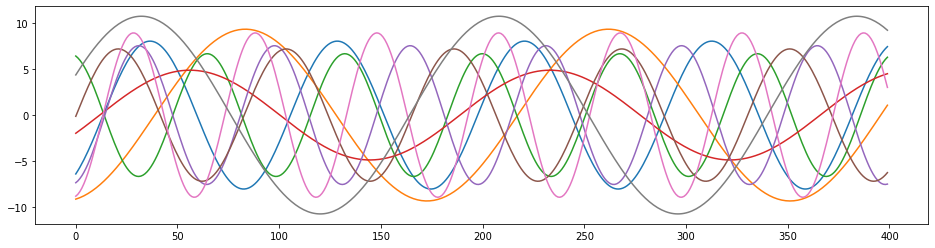

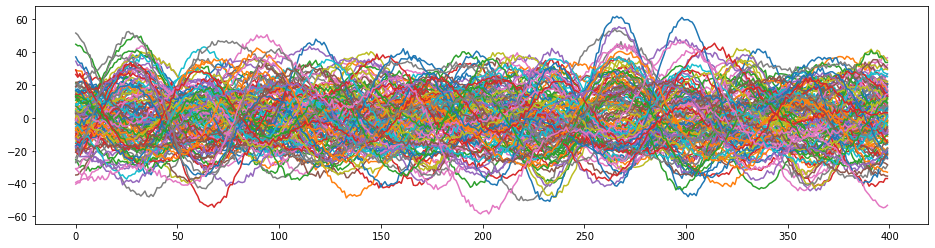

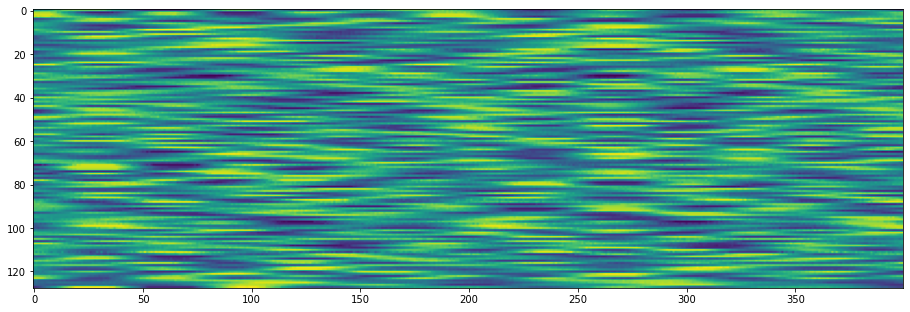

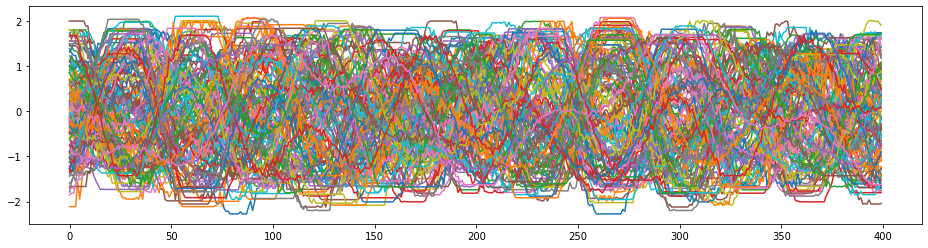

In [48]:
N = 10000
n_dim_in = 8
n_dim_out = 128
data_sin_pos = torch.arange(N).view(-1, 1).repeat(1, n_dim_in)
data_sin_amp = torch.rand(1, n_dim_in) * 10 + 1
data_sin_freq = 2 * np.pi / (torch.rand(1, n_dim_in) * 190 + 10)
data_sin_phase = 2 * np.pi * torch.rand(1, n_dim_in)
data_sin = data_sin_amp * torch.sin(data_sin_freq * data_sin_pos + data_sin_phase)

data_sin_orig = data_sin

a = data_sin[:400]
plt.figure(figsize=(16, 4))
plt.plot(a.numpy())
plt.show() 

data_sin = torch.mm(data_sin, torch.randn(n_dim_in, n_dim_out)) + (torch.rand(1, n_dim_out) * 10 - 5)
data_sin += torch.randn_like(data_sin) * 1
data_sin = data_sin.unsqueeze(0)

a = data_sin[0, :400]
plt.figure(figsize=(16, 4))
plt.plot(a.numpy())
plt.show() 

a = np.clip(a, *np.percentile(a, [5, 95], axis=0))
a = a - a.mean(dim=0, keepdims=True)
a = a / a.std(dim=0, keepdims=True)

plt.figure(figsize=(16, 16 * a.size(1) / a.size(0)))
plt.imshow(a.numpy().T)
plt.show()

plt.figure(figsize=(16, 4))
plt.plot(a.numpy())
plt.show() 

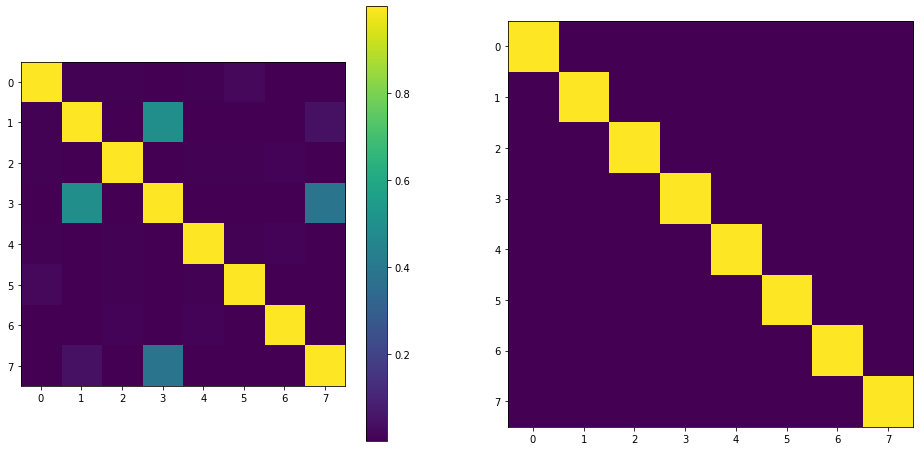

6.38 unique features


In [61]:
a = data_sin_orig
a = (a - a.mean(dim=0, keepdim=True)) / a.std(dim=0, keepdim=True)
mc = torch.mm(a.T, a).abs() / len(a)
_, axs = plt.subplots(1, 2, figsize=(8 * 2, 8))
_p1 = axs[0].imshow(mc.numpy())
axs[1].imshow(mc.numpy() > 0.5)
plt.colorbar(_p1, ax=axs[0])
plt.show()

print(f'{(1 / mc.mean()).item():.2f} unique features')

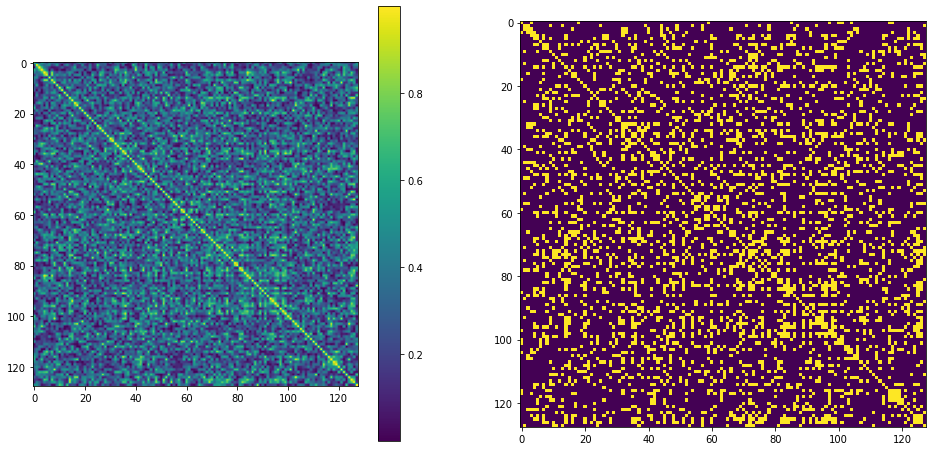

3.09 unique features


In [77]:
a = data_sin[0]
a = (a - a.mean(dim=0, keepdim=True)) / a.std(dim=0, keepdim=True)
mc = torch.mm(a.T, a).abs() / len(a)
_, axs = plt.subplots(1, 2, figsize=(8 * 2, 8))
_p1 = axs[0].imshow(mc.numpy())
axs[1].imshow(mc.numpy() > 0.5)
plt.colorbar(_p1, ax=axs[0])
plt.show()

print(f'{(1 / mc.mean()).item():.2f} unique features')

In [62]:
!rm -r lightning_logs/

In [63]:
# for sin
model = StreamEncoder(       
    encoder_x2z=torch.nn.Sequential(
        TBatchNorm(n_dim_out),
        ClipRange((-2.5, 2.5)),
        TDropout(0.3),
        torch.nn.Linear(n_dim_out, 16),
    ),
    history_size=28, predict_size=3, predict_lag=0,
    z_channels=16, c_channels=4,
    var_gamma_z=0.5, var_gamma_c=0.2, 
    lr=0.00005, weight_decay=0.0, step_size=10, gamma=0.8,
    cpc_w=0.1, cov_z_w=0.01, var_z_w=0.1, cov_c_w=2.0, var_c_w=0.1,
)

In [17]:
trainer = pl.Trainer(
    gpus=[3],
    max_epochs=100,
    log_every_n_steps=10,
    progress_bar_refresh_rate=50, weights_summary=None,
    logger=pl.loggers.TensorBoardLogger(
        save_dir='lightning_logs/',
        default_hp_metric=False,
    )
)

In [18]:
l3dt = Loader3DTensor(model)
train_dl = l3dt.get_train_dataloader(data_sin[:, :5000], 128, 4)
valid_dl = l3dt.get_valid_dataloader(data_sin[:, 5000:], 16, 0)

In [19]:
batch = next(iter(train_dl))[0]

In [20]:
trainer.fit(model, train_dataloader=train_dl, val_dataloaders=valid_dl)

Validation sanity check: 0it [00:00, ?it/s]

/mnt2/kireev/pipenv_envs/pytorch-lifestream-bcSZKFyz/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Training: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# Tuning

In [21]:
def r_exp(b, m):
    a = b / m
    b = b * m
    a = np.log(a)
    b = np.log(b)
    
    return np.exp(np.random.random(1)[0] * (b - a) + a)

In [66]:
best_model = StreamEncoder.load_from_checkpoint(
    'lightning_logs/default/version_4/checkpoints/epoch=99-step=3899.ckpt')

In [67]:
for i in range(30):
    mul_c = 10.0
    params = dict(
        lr=r_exp(best_model.hparams.lr, mul_c),
        cpc_w=0.1,
        cov_z_w=r_exp(best_model.hparams.cov_z_w, mul_c),
        var_z_w=r_exp(best_model.hparams.var_z_w, mul_c),
        cov_c_w=r_exp(best_model.hparams.cov_c_w, mul_c),
        var_c_w=r_exp(best_model.hparams.var_c_w, mul_c),
    )
    print(f'[{i:04d}] - start', end='')
    stream_encoder = StreamEncoder(
        **{k: v for k, v in best_model.hparams.items() if k in (
            'history_size', 'predict_size', 'predict_lag',
            'var_gamma_z', 'var_gamma_c', 'step_size', 'gamma',
            'weight_decay', 'z_channels', 'c_channels',
        )},
        **params,
        encoder_x2z=torch.nn.Sequential(
            TBatchNorm(n_dim_out),
            ClipRange((-2.5, 2.5)),
            TDropout(0.3),
            torch.nn.Linear(n_dim_out, 16),
        ),   
    )
    trainer = pl.Trainer(
        gpus=[3],
        max_epochs=100,
        log_every_n_steps=50,
        progress_bar_refresh_rate=0, weights_summary=None,
        logger=pl.loggers.TensorBoardLogger(
            save_dir='lightning_logs/',
            default_hp_metric=False,
        )
    )

    trainer.fit(stream_encoder, train_dataloader=train_dl, val_dataloaders=valid_dl)
    print(' - done')

[0000] - start

/mnt2/kireev/pipenv_envs/pytorch-lifestream-bcSZKFyz/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 24 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


 - done
[0001] - start - done
[0002] - start - done
[0003] - start - done
[0004] - start - done
[0005] - start - done
[0006] - start - done
[0007] - start - done
[0008] - start - done
[0009] - start - done
[0010] - start - done
[0011] - start - done
[0012] - start - done
[0013] - start - done
[0014] - start - done
[0015] - start - done
[0016] - start - done
[0017] - start - done
[0018] - start - done
[0019] - start - done
[0020] - start - done
[0021] - start - done
[0022] - start - done
[0023] - start - done
[0024] - start - done
[0025] - start - done
[0026] - start - done
[0027] - start - done
[0028] - start - done
[0029] - start - done


# Inference

In [68]:
model = StreamEncoder.load_from_checkpoint('lightning_logs/default/version_38/checkpoints/epoch=99-step=3899.ckpt')

In [69]:
print(model.hparams)

"c_channels":   4
"cov_c_w":      17.417364901050096
"cov_z_w":      0.0021543928892928457
"cpc_w":        0.1
"encoder_x2z":  Sequential(
  (0): TBatchNorm(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (1): ClipRange()
  (2): TDropout()
  (3): Linear(in_features=128, out_features=16, bias=True)
)
"gamma":        0.8
"history_size": 28
"lr":           0.0018377594456463174
"predict_lag":  0
"predict_size": 3
"step_size":    10
"var_c_w":      1.028709041043162
"var_gamma_c":  0.2
"var_gamma_z":  0.5
"var_z_w":      0.07710095568302593
"weight_decay": 0.0
"z_channels":   16


# Eval

In [70]:
model.eval()

with torch.no_grad():
    pred_horizon = 1
    z, c = model(data_sin)
    p = model.lin_predictors_c2p[pred_horizon - 1](c)

In [71]:
x, z, c, p = [t[:, :300] for t in [data_sin, z, c, p]]

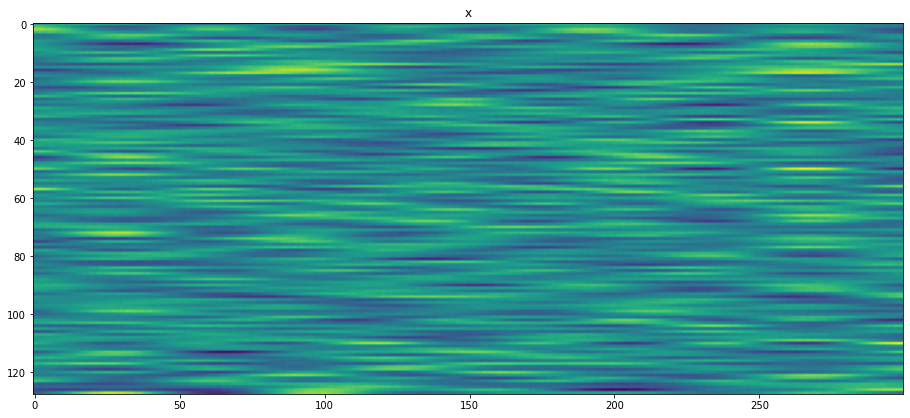

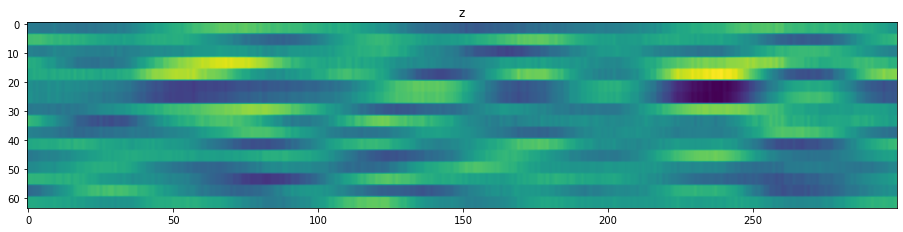

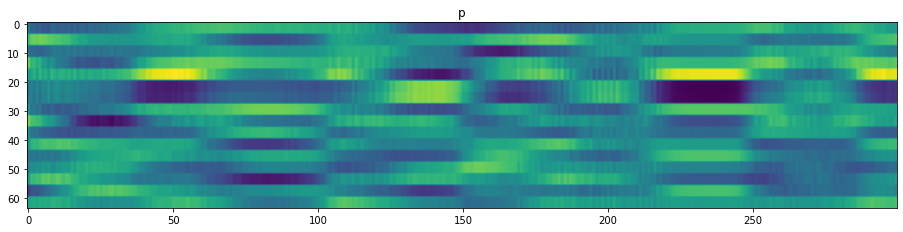

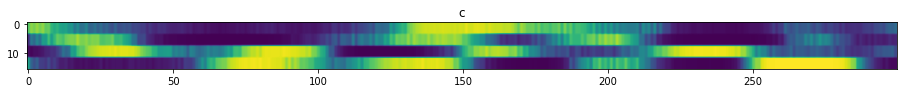

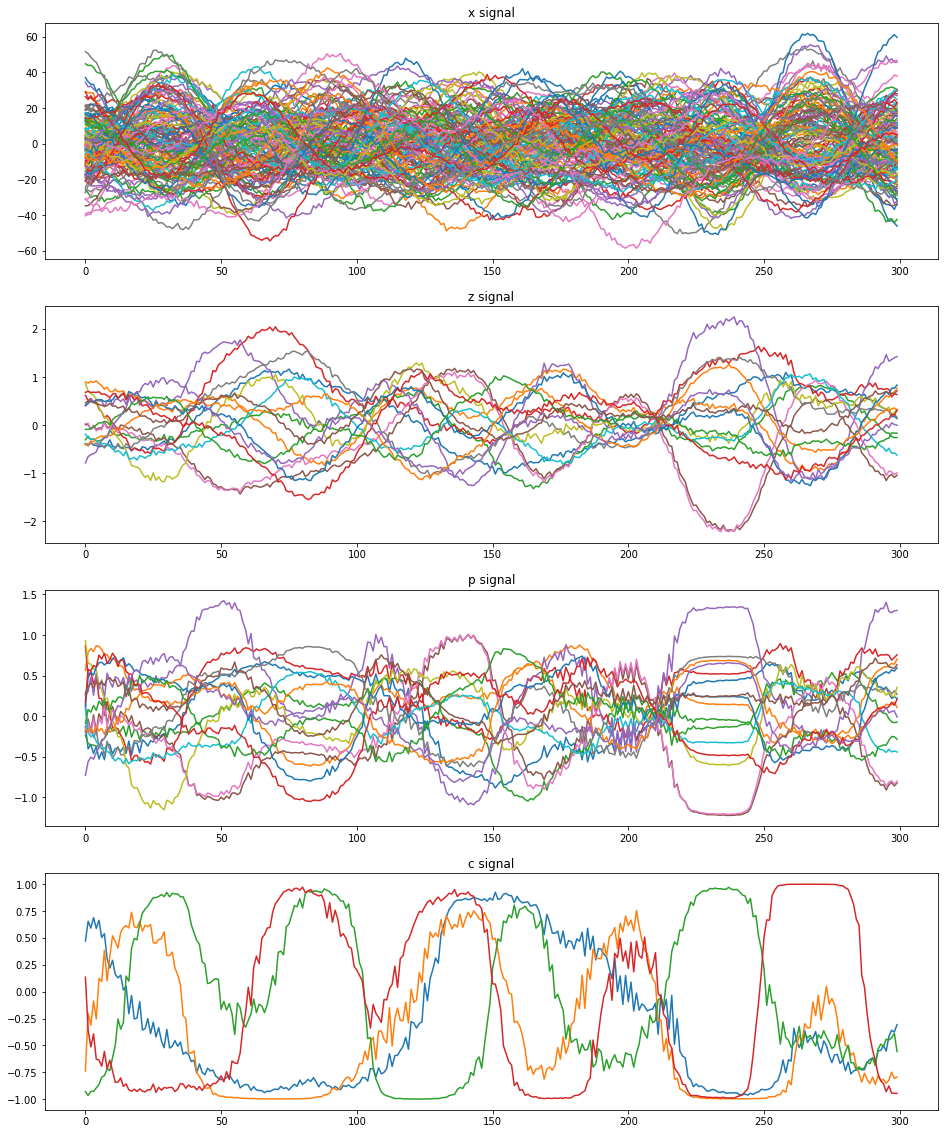

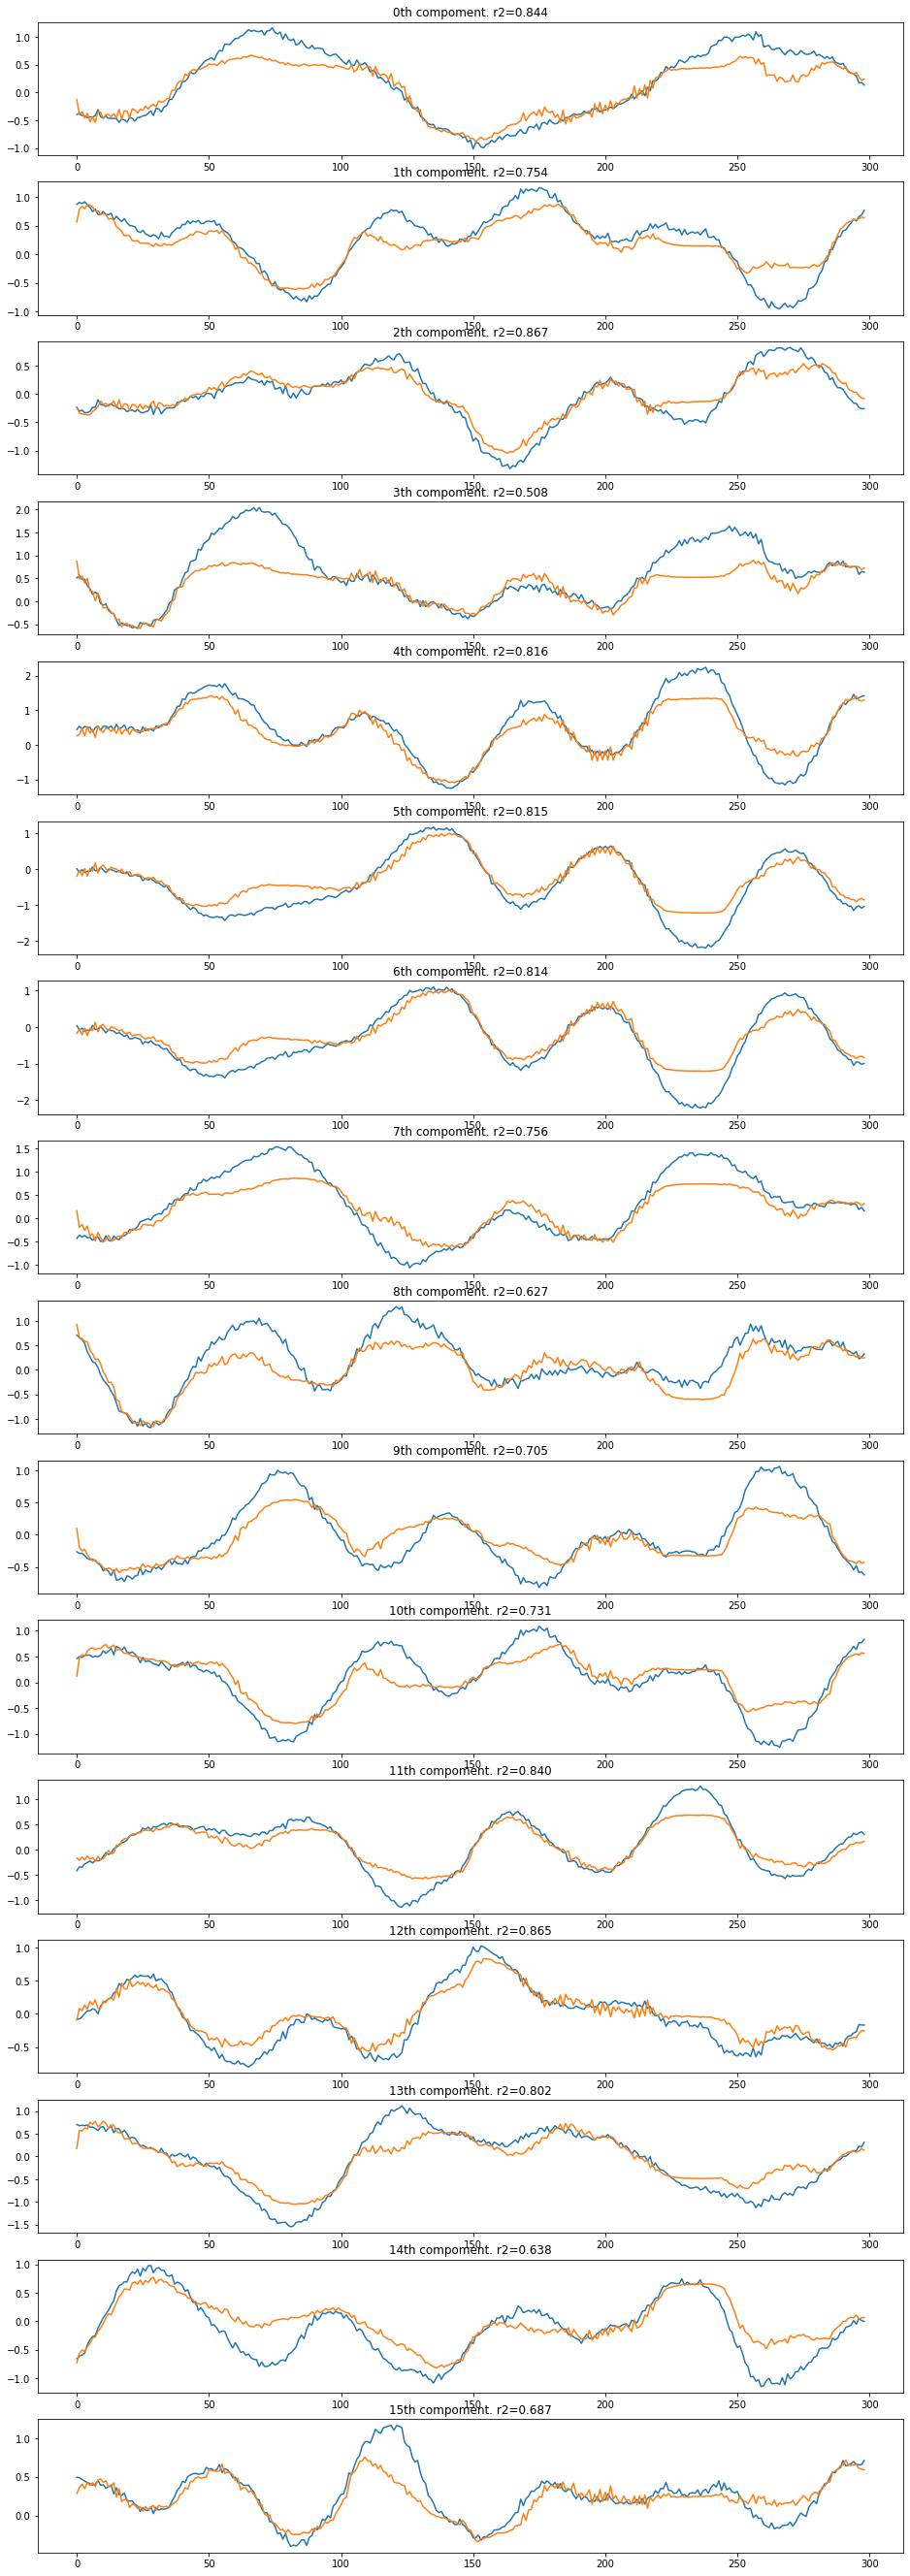

r2_score = 0.754
z_self_corr = 0.466
z_unique_features = 2.000
cpc_pow = 1.509


In [79]:
a = x.unsqueeze(-1).repeat(1, 1, 1, 1).view(*x.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('x')
plt.show()

a = z.unsqueeze(-1).repeat(1, 1, 1, 4).view(*z.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('z')
plt.show()

a = p.unsqueeze(-1).repeat(1, 1, 1, 4).view(*p.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('p')
plt.show()

a = c.unsqueeze(-1).repeat(1, 1, 1, 4).view(*c.size()[:-1], -1)[0].detach().numpy()
plt.figure(figsize=(16, 16 * a.shape[1] / a.shape[0]))
plt.imshow(a.T)
plt.title('c')
plt.show()

_, axs = plt.subplots(4, 1, figsize=(16, 5 * 4))
axs[0].plot(x[0].detach().numpy())
axs[0].set_title('x signal')
axs[1].plot(z[0].detach().numpy())
axs[1].set_title('z signal')
axs[2].plot(p[0].detach().numpy())
axs[2].set_title('p signal')
axs[3].plot(c[0].detach().numpy())
axs[3].set_title('c signal')
plt.show()


_, axs = plt.subplots(z.size(2), 1, figsize=(16, 3 * z.size(2)))
for i, ax in zip(range(z.size(2)), axs):
    ax.plot(z[0, pred_horizon:, i].detach().numpy())
    ax.plot(p[0, :-pred_horizon, i].detach().numpy())
    r2_score = 1 - (z[0, pred_horizon:, i] - p[0, :-pred_horizon, i]).pow(2).sum() / \
        ((z[0, pred_horizon:, i] - z[0, pred_horizon:, i].mean(dim=0, keepdim=True)).pow(2).sum() + 1e-6)
    ax.set_title(f'{i}th compoment. r2={r2_score:.3f}')
plt.show()

r2_score = 1 - (z[:, pred_horizon:] - p[:, :-pred_horizon]).pow(2).sum(dim=1) / \
    ((z[:, pred_horizon:] - z[:, pred_horizon:].mean(dim=1, keepdim=True)).pow(2).sum(dim=1) + 1e-6)
print(f'r2_score = {r2_score.mean():.3f}')

_z = (z - z.mean(dim=1, keepdims=True)) / (z.std(dim=1, keepdims=True) + 1e-6)
mc = torch.bmm(_z.transpose(1, 2), _z).abs() / _z.size(1)
C = mc.size(1)
off_diag_ix = (1 - torch.eye(C)).bool().view(-1)
m = mc.view(-1, C * C)[:, off_diag_ix].mean()
print(f'z_self_corr = {m:.3f}')
print(f'z_unique_features = {1 / (mc.mean() + 1e-3):.3f}', )
print(f'cpc_pow = {r2_score.mean() / (mc.mean() + 1e-3):.3f}')

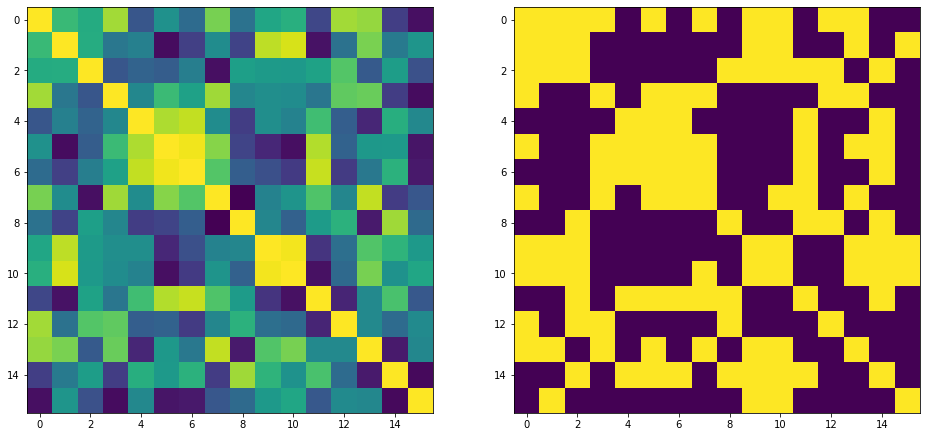

In [80]:
_, axs = plt.subplots(1, 2, figsize=(8 * 2, 8))
axs[0].imshow(mc[0].numpy())
axs[1].imshow((mc[0] > 0.5).numpy())
# plt.colorbar()
plt.show()

In [324]:
from sklearn.decomposition import PCA

In [338]:
(PCA(n_components=data_sin_orig.size(1)).fit(data_sin_orig).explained_variance_ratio_.cumsum() < 0.99).sum() + 1

8

In [339]:
(PCA(n_components=x.size(2)).fit(x[0]).explained_variance_ratio_.cumsum() < 0.99).sum() + 1

6

In [340]:
(PCA(n_components=z.size(2)).fit(z[0]).explained_variance_ratio_.cumsum() < 0.99).sum() + 1

4